# Data Analysis Part

In [95]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
from sklearn.linear_model import LinearRegression 
import plotly.express as ex
from sklearn.model_selection import train_test_split

## Pandas
Pandas is used to convey python to bring the pandas data analysis library intlo current environment.

## Numpy
Numpy is applied for scientific programming for numbers also comprises multidimentional objects in arrays.

## Matplotlib
Matplotlib is an easy-to-use, low-level data visualization library that is built on NumPy arrays. It consists of various plots like scatter plot, line plot, histogram, etc. Matplotlib provides a lot of flexibility. 

## Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

## SciPy
SciPy is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other computing functions.

## sklearn
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering.

## Lime
Lime tries to solve for model interpretability by producing locally faithful explanations. 

In [96]:
df=pd.read_excel('C:\\Users\\STSC\\Downloads\\Cleaned Data.xlsx')
df

,Unnamed: 0.1,Unnamed: 0,zpid,city,state,homeStatus,bedrooms,bathrooms,price,resoFacts_pricePerSquareFoot,...,lotAreaUnits,streetAddress,zipcode,regionString,homeType,attributionInfo_agentEmail,attributionInfo_agentName,attributionInfo_agentPhoneNumber,attributionInfo_brokerName,attributionInfo_brokerPhoneNumber
0,619,619,2061968146,Albany,CA,FOR_SALE,1,1,520000,743.0,...,Acres,409 Evelyn Ave #108,94706,Albany CA 94706,CONDO,tpoperealestate@gmail.com,Thomas A Pope,707-410-7818,"Pope Real Estate, Inc",707-425-2121
1,718,718,24853511,Albany,CA,FOR_SALE,1,1,448000,571.0,...,Square Feet,555 Pierce St APT 1026,94706,Albany CA 94706,CONDO,albanyhillrealty@aol.com,Allan Bolte,510-229-7212,ALBANY HILL REALTY,510-525-7640
2,839,839,24854940,Albany,CA,FOR_SALE,3,1,898000,702.0,...,Square Feet,816 Pomona Ave,94706,Albany CA 94706,SINGLE_FAMILY,leonapuppylove@gmail.com,Leona Carter,707-297-5675,New Destiny Homes,707-297-5675
3,767,767,2062170992,Albany,CA,FOR_SALE,3,3,1395000,855.0,...,Square Feet,638 Kains Ave,94706,Kains Albany Albany CA 94706,CONDO,liana@zipcodeeastbay.com,Liana Dickson,510-944-9400,Zip Code East Bay,510-280-3303
4,77,77,24854567,Albany,CA,FOR_SALE,2,1,875000,990.0,...,Square Feet,1129 Portland Ave,94706,Albany CA 94706,SINGLE_FAMILY,ellisaclark@gmail.com,Ellis Clark,NaN,Compass,510-339-8900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,606,606,15600447,Woodside,CA,FOR_SALE,3,2,1595000,853.0,...,Acres,4 Fremont Way,94062,Woodside CA 94062,SINGLE_FAMILY,houda.realtor@gmail.com,Houda Tanverakul,415-794-3461,Compass,415-660-9955
777,189,189,15589436,Woodside,CA,FOR_SALE,0,0,2500000,NaN,...,Acres,14621 Skyline Blvd,94062,Woodside CA 94062,LOT,scott@scottdancer.com,Scott Dancer,650-888-8199,Compass,650-529-1111
778,659,659,15597479,Woodside,CA,FOR_SALE,3,2,3295000,1337.0,...,Acres,444 Hillside Dr,94062,Woodside CA 94062,SINGLE_FAMILY,erika@erikademma.com,Erika Demma,650-740-2970,Compass,650-529-1111
779,229,229,15600467,Woodside,CA,FOR_SALE,2,1,855000,1006.0,...,Acres,16 Big Tree Way,94062,Woodside CA 94062,SINGLE_FAMILY,mary@maryliurealtor.com,Mary Liu,NaN,Vanguard Properties,415-510-8600


Displaying the Average price for each city

In [97]:
city_df = df.groupby(by="city")
city_price_df = pd.DataFrame(city_df['price'].mean().round())
city_price_df.sort_values('price')

,price
city,
San Carlos,180000.0
La Honda,349999.0
Emeryville,585838.0
Albany,678759.0
Concord,680743.0
East Palo Alto,799000.0
San Leandro,887018.0
Hayward,912057.0
Oakland,942024.0


Converting numerical values into categorical values as regression will not accept string values.

In [98]:
df['city'] = df["city"].astype('category')
df["city"] = df["city"].cat.codes

df['homeType'] = df["homeType"].astype('category')
df["homeType"] = df["homeType"].cat.codes

Imputing null values with zero

In [99]:
df['resoFacts_pricePerSquareFoot'] = df['resoFacts_pricePerSquareFoot'].fillna(0)
df['rentZestimate'] = df['rentZestimate'].fillna(0)
df['zestimate'] = df['zestimate'].fillna(0)
df['yearBuilt'] = df['yearBuilt'].fillna(0)

In [100]:
x_columns = ['zpid', 'city', 'bedrooms', 'bathrooms', 'resoFacts_pricePerSquareFoot',
       'yearBuilt', 'lotSize', 'rentZestimate', 'zestimate', 'zipcode']
xcolumns = ['bedrooms', 'bathrooms', 'lotSize','city']

x = df[x_columns]
y = df['price']


# Developing Regression Model

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train

,zpid,city,bedrooms,bathrooms,resoFacts_pricePerSquareFoot,yearBuilt,lotSize,rentZestimate,zestimate,zipcode
608,19601214,24,2,2,595.0,1969.0,0,2949.0,758670.0,95051
577,122009352,23,4,5,719.0,2016.0,4356,5993.0,2077966.0,94582
527,24894010,20,9,0,540.0,1938.0,20473,1740.0,2700000.0,94578
341,24786279,13,5,3,342.0,1870.0,8712,0.0,0.0,94605
352,24782510,13,3,3,533.0,1926.0,3049,3998.0,1008400.0,94619
...,...,...,...,...,...,...,...,...,...,...
715,24920858,27,3,3,818.0,1999.0,3920,3800.0,1429686.0,94587
767,18424857,28,2,2,606.0,1989.0,0,3698.0,870400.0,94595
72,2063702421,2,2,1,814.0,1980.0,9147,0.0,0.0,94704
235,89032460,8,1,1,0.0,2009.0,13478,2300.0,435003.0,94608


In [102]:
reg_model = LinearRegression()

In [103]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [104]:
reg_model.predict(x_test)

array([ 919360.39398741,  979950.44836413,  533820.8028091 ,
       1640503.06161186,  520996.17608453, 1896483.55670407,
       1430745.13736684, 1853747.89192228, 1227935.96646673,
        805804.65771745,  751108.64697476,  423567.34036119,
       1575245.77516651,  584678.37925776, 1537267.57073648,
       1753274.69968574,  636261.71874709, 1041720.72454341,
       1244587.57632694,  625385.67164688,  520999.71871976,
        325215.29185885, 2035236.84653773, 1591327.36930765,
        681251.91567445, 1550160.82400035, 1023965.65196124,
       2045912.78782393,  768579.56931221, 2651306.28678081,
        525866.62940407,  718090.6841084 , 1403872.6179384 ,
       1591582.25698989, 1901682.89379178, 2774456.59169646,
        982176.61891158, 1090084.40022713, 1724772.68488089,
       2681128.84896277, 1355256.27598906, 1167292.87162094,
        134780.27188603,  528792.30098135, 1515532.66431798,
       2704774.01690414, 1074898.65195787,  528435.84821893,
       1437257.03314424,

In [106]:
reg_model.score(x_test, y_test)

0.7066120575819772

Regression model score is around 70% accurate.

In [107]:
y_pred = reg_model.predict(x_test)

Regression Model for Zillow Data Set

Mean Absolute Error:  247781.0160195814
Mean Squared Error:  161613840270.4288
Root Mean Squared Error:  497.7760701556287
Variance Score:  0.7113699170840202
2890285.8931666687
[ 1.74367529e-04 -2.23527815e+03  1.23985049e+05  3.70934473e+04
  4.82089110e+02 -2.02976216e+02 -1.37713569e-03 -2.14253061e+00
  5.65098838e-01 -2.85514057e+01]
Regression Model for Zillow Data Set

Accuracy Measures for Validation Set

Regression statistics

                      Mean Error (ME) : 51194.5761
       Root Mean Squared Error (RMSE) : 402012.2390
            Mean Absolute Error (MAE) : 247781.0160
          Mean Percentage Error (MPE) : -22.1010
Mean Absolute Percentage Error (MAPE) : 38.7900
Scatter Plot
R^2 is:  0.7830923482854768


C:\Users\STSC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


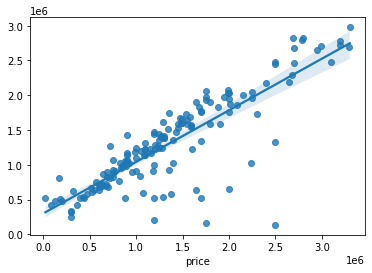

In [108]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('Variance Score: ', metrics.explained_variance_score(y_test,y_pred))
print(reg_model.intercept_)
print(reg_model.coef_)

print('Regression Model for Zillow Data Set')

from dmba import regressionSummary

print()
print('Accuracy Measures for Validation Set')
regressionSummary(y_test,y_pred)

print('Scatter Plot')
sns.regplot(y_test,y_pred,fit_reg=True)
print("R^2 is: ",reg_model.score(x,y))


# Scatter plot with price against zestimate (zillow Estimate)

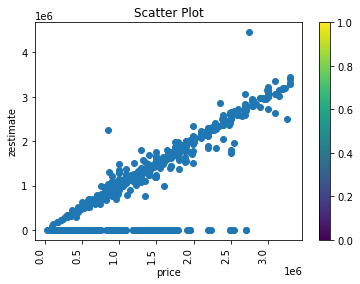

In [109]:
plt.scatter(df['price'], df['zestimate'])
  
plt.title("Scatter Plot")

plt.xlabel('price')
plt.ylabel('zestimate')
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.colorbar()
  
plt.show()

# Bar Chart for Price against number of Bedrooms

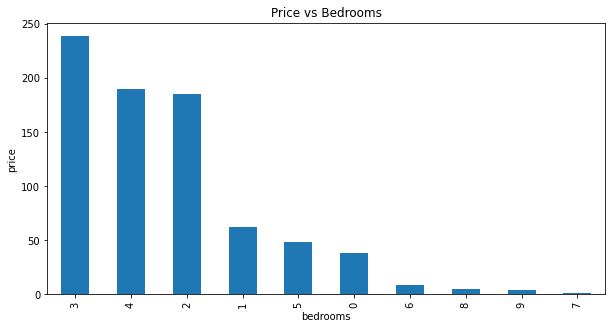

In [110]:
df.bedrooms.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Price vs Bedrooms")
plt.ylabel('price')
plt.xlabel('bedrooms');

# Bar Chart for Price against number of Bathrooms

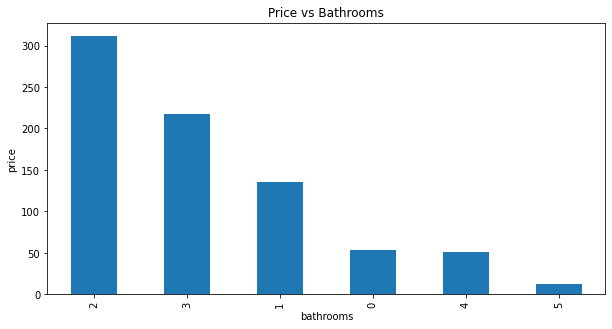

In [111]:
df.bathrooms.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Price vs Bathrooms")
plt.ylabel('price')
plt.xlabel('bathrooms');

# HeatMap for displaying Correlation

Text(0.5, 1.0, 'Price Correlation with other aspects in data')

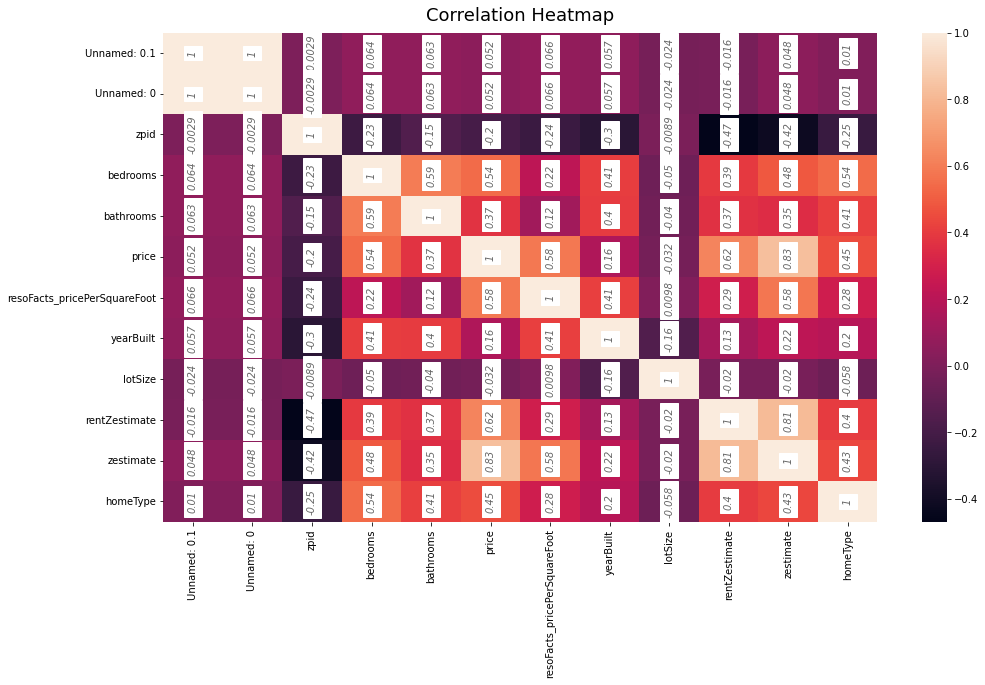

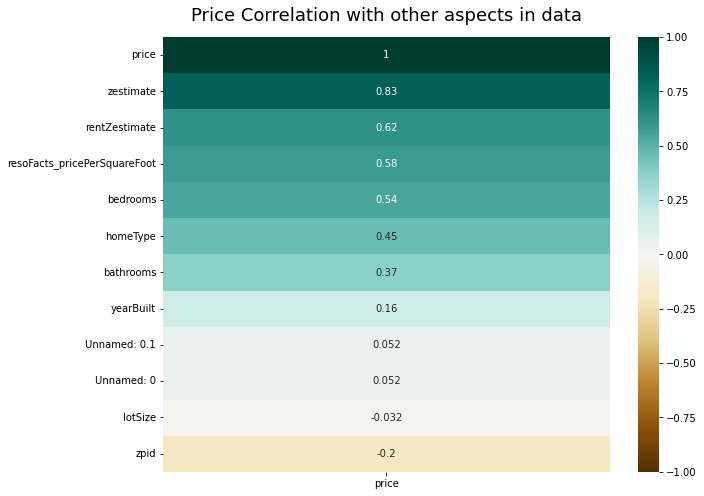

In [112]:
df_intData = df.drop(labels=['streetAddress', 'city', 'state', 'zipcode',], axis=1)

plt.figure(figsize=(16,9))
hmap = sns.heatmap(df_intData.corr(), annot=True, 
            annot_kws={'fontsize':10, 
                       'fontstyle':'italic',  
                       'color':"k",
                       'alpha':0.6, 
                       'rotation':"vertical",
                       'verticalalignment':'center',
                       'backgroundcolor':'w'})
hmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_intData.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Price Correlation with other aspects in data', fontdict={'fontsize':18}, pad=16)